In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\dekstop moved ap\Data set\laptop price\laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

29

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df['Ram'].value_counts()

Ram
8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

Data Cleaning

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df['Ram']=df['Ram'].str.replace("GB","")
df['Weight']=df['Weight'].str.replace("kg","")

In [13]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [15]:
df['Touchscreen'].value_counts()

Touchscreen
0    1086
1     188
Name: count, dtype: int64

In [16]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [97]:
import re
x = "Intel Core i5 7200x3453U 2.5GHz"
y = re.findall(r'(\d+\.?\d+)',x)
y
#personal test , we can ignore

['7200', '3453', '2.5']

In [19]:
df['x_resolution'] = df['ScreenResolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df['y_resolution'] = df['ScreenResolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[1])

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [21]:
df['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [22]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [23]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [24]:
df[df['TypeName']=='Netbook'].head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution
20,Asus,Netbook,11.6,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.432,0,0,1366,768
376,Lenovo,Netbook,11.6,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,29463.840,0,1,1366,768
430,Samsung,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,0,0,1366,768
461,Acer,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.4,23176.800,0,0,1366,768
500,Asus,Netbook,11.6,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.2,18115.200,0,0,1366,768


In [25]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [26]:
df['cpu_speed']=df['Cpu'].str.findall(r'(\d+\.+\d+GHz)').apply(lambda x: " ".join(x))


In [27]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_speed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3GHz
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8GHz
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5GHz
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7GHz
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1GHz


In [28]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [29]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_speed,cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3GHz,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8GHz,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5GHz,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7GHz,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1GHz,Intel Core i5


In [30]:
df['cpu_name'].value_counts()

cpu_name
Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1

In [31]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [32]:
df['cpu_name']=df['cpu_name'].apply(processor)

In [33]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_speed,cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3GHz,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8GHz,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5GHz,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7GHz,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1GHz,Intel Core i5


In [34]:
df['cpu_name'].value_counts()

cpu_name
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             61
Name: count, dtype: int64

In [35]:
df.drop(columns=['Cpu'],inplace=True)

In [36]:
df['cpu_speed_ghz']=df['cpu_speed'].str.findall(r'(\d+\.+\d)').apply(lambda x: " ".join(x))

In [37]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_speed,cpu_name,cpu_speed_ghz
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3GHz,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8GHz,Intel Core i5,1.8
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5GHz,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7GHz,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1GHz,Intel Core i5,3.1


In [38]:
df.drop(columns='cpu_speed',inplace=True)

In [39]:
df['Gpu'] = df['Gpu'].apply(lambda x: x.split()[0])

In [40]:
df['Gpu'].value_counts()

Gpu
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [41]:
df =  df[df['Gpu'] != 'ARM']

In [42]:
df['Gpu'].value_counts()

Gpu
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

In [43]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8
2,HP,Notebook,15.6,8,256GB SSD,Intel,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1


In [44]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [98]:
import re
x = "1.0TB Hybrid dsff"
y = re.findall(r'(\d+\w+\W+\w+|\d+\.+\d+\w+\W+\w+)',x)
y
#personal test , we can ignore

['1.0TB Hybrid']

In [46]:
new = df['Memory'].str.findall(r'(\d+\w+\W+\w+|\d+\.+\d+\w+\W+\w+)').apply(lambda x:" ".join(x))

In [47]:
print(new.head())
print(df['Memory'].head())

0      128GB SSD
1    128GB Flash
2      256GB SSD
3      512GB SSD
4      256GB SSD
Name: Memory, dtype: object
0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: Memory, dtype: object


In [48]:
new.unique()

array(['128GB SSD', '128GB Flash', '256GB SSD', '512GB SSD', '500GB HDD',
       '256GB Flash', '1TB HDD', '32GB Flash', '128GB SSD 1TB HDD',
       '256GB SSD 256GB SSD', '64GB Flash', '256GB SSD 1TB HDD',
       '256GB SSD 2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD 1TB HDD', '1TB SSD',
       '256GB SSD 500GB HDD', '128GB SSD 2TB HDD', '512GB SSD 512GB SSD',
       '16GB SSD', '16GB Flash', '512GB SSD 256GB SSD',
       '512GB SSD 2TB HDD', '64GB Flash 1TB HDD', '180GB SSD',
       '1TB HDD 1TB HDD', '32GB HDD', '1TB SSD 1TB HDD', '512GB Flash',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD 1.0TB Hybrid', '256GB SSD 1.0TB Hybrid'], dtype=object)

In [49]:
df['ssd']=new.apply(lambda x:" ".join(re.findall(r'\d+\w+\W+SSD',x)) if 'SSD' in x else '0')
df['hdd']=new.apply(lambda x:" ".join(re.findall(r'\d+\w+\W+HDD',x)) if 'HDD' in x else '0')
df['flash_storage']=new.apply(lambda x:" ".join(re.findall(r'\d+\w+\W+Flash',x)) if 'Flash' in x else '0')
df['hybrid']=new.apply(lambda x:" ".join(re.findall(r'\d+\w+\W+Hybrid',x)) if 'Hybrid' in x else '0')

In [50]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd,hdd,flash_storage,hybrid
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128GB SSD,0,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,0,0,128GB Flash,0
2,HP,Notebook,15.6,8,256GB SSD,Intel,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256GB SSD,0,0,0
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512GB SSD,0,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256GB SSD,0,0,0


In [51]:
def find_gb_tb(x):
     if 'GB' in x.split()[0] :
          return (x.split()[0]).replace('GB','')
     elif 'TB' in x.split()[0]:
          y = x.split()[0].replace('TB','')
          return str(float(y)*1000.0)
     elif x==None:
          return 0

In [52]:
df['ssd_gb'] = df['ssd'].apply(find_gb_tb)
df['hhd_gb'] = df['hdd'].apply(find_gb_tb)
df['flash_storage_gb'] = df['flash_storage'].apply(find_gb_tb)
df['hybrid_gb'] = df['hybrid'].apply(find_gb_tb)

In [53]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,cpu_name,cpu_speed_ghz,ssd,hdd,flash_storage,hybrid,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
650,Asus,Gaming,17.3,32,512GB SSD,Nvidia,Windows 10,3.8,149130.72,0,...,Intel Core i7,2.7,512GB SSD,0,0,0,512,None,None,None
123,HP,Notebook,17.3,16,512GB SSD,Nvidia,Windows 10,2.5,67718.88,0,...,Intel Core i7,1.8,512GB SSD,0,0,0,512,None,None,None
1134,Acer,Notebook,15.6,4,1TB HDD,Nvidia,Windows 10,2.23,32820.48,0,...,Intel Core i5,2.5,0,1TB HDD,0,0,None,1000.0,None,None
1203,Dell,Ultrabook,13.3,16,512GB SSD,Intel,Windows 10,1.2,142790.40,1,...,Intel Core i7,2.7,512GB SSD,0,0,0,512,None,None,None
656,Dell,Notebook,15.6,8,256GB SSD,AMD,Windows 10,2.2,48964.32,0,...,Intel Core i7,1.8,256GB SSD,0,0,0,256,None,None,None


In [54]:
df.drop(columns=['ssd','hdd','flash_storage','hybrid','Memory'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
0,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128,None,None,None
1,Apple,Ultrabook,13.3,8,Intel,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,None,None,128,None
2,HP,Notebook,15.6,8,Intel,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256,None,None,None
3,Apple,Ultrabook,15.4,16,AMD,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512,None,None,None
4,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256,None,None,None


In [56]:
df.isnull().sum()

Company                0
TypeName               0
Inches                 0
Ram                    0
Gpu                    0
OpSys                  0
Weight                 0
Price                  0
Touchscreen            0
Ips                    0
x_resolution           0
y_resolution           0
cpu_name               0
cpu_speed_ghz          0
ssd_gb               436
hhd_gb               714
flash_storage_gb    1203
hybrid_gb           1263
dtype: int64

In [57]:
df=df.fillna(0)

In [58]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
0,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,0,0,128,0
2,HP,Notebook,15.6,8,Intel,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,16,AMD,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256,0,0,0


In [59]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [60]:
def ops(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
        return 'Mac'
    else:
        return 'Others'

In [61]:
df['OpSys'] = df['OpSys'].apply(ops)

In [62]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
0,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel,Mac,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,0,0,128,0
2,HP,Notebook,15.6,8,Intel,Others,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,16,AMD,Mac,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256,0,0,0


In [63]:
df['cpu_speed_ghz'].unique()

array(['2.3', '1.8', '2.5', '2.7', '3.1', '', '2.2', '1.6', '2.8', '1.2',
       '2.9', '2.4', '1.4', '1.5', '1.9', '1.1', '2.0', '1.3', '2.6',
       '3.6', '3.2', '1.0', '2.1', '0.9'], dtype=object)

Data Cleaning Process done

Now EDA:

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   Ram               1273 non-null   object 
 4   Gpu               1273 non-null   object 
 5   OpSys             1273 non-null   object 
 6   Weight            1273 non-null   object 
 7   Price             1273 non-null   float64
 8   Touchscreen       1273 non-null   int64  
 9   Ips               1273 non-null   int64  
 10  x_resolution      1273 non-null   object 
 11  y_resolution      1273 non-null   object 
 12  cpu_name          1273 non-null   object 
 13  cpu_speed_ghz     1273 non-null   object 
 14  ssd_gb            1273 non-null   object 
 15  hhd_gb            1273 non-null   object 
 16  flash_storage_gb  1273 non-null   object 
 17  

In [65]:
df['cpu_speed_ghz']=df['cpu_speed_ghz'].apply(lambda x: '0' if x=='' else x)

In [66]:
df['Inches'] = df['Inches'].astype('float32')
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float32')
df['x_resolution'] = df['x_resolution'].astype('int')
df['y_resolution'] = df['y_resolution'].astype('int')
df['cpu_speed_ghz']=df['cpu_speed_ghz'].astype('float')
df['ssd_gb']=df['ssd_gb'].astype('float32')
df['hhd_gb']=df['hhd_gb'].astype('float32')
df['flash_storage_gb']=df['flash_storage_gb'].astype('float32')
df['hybrid_gb']=df['hybrid_gb'].astype('float32')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   Ram               1273 non-null   int32  
 4   Gpu               1273 non-null   object 
 5   OpSys             1273 non-null   object 
 6   Weight            1273 non-null   float32
 7   Price             1273 non-null   float64
 8   Touchscreen       1273 non-null   int64  
 9   Ips               1273 non-null   int64  
 10  x_resolution      1273 non-null   int32  
 11  y_resolution      1273 non-null   int32  
 12  cpu_name          1273 non-null   object 
 13  cpu_speed_ghz     1273 non-null   float64
 14  ssd_gb            1273 non-null   float32
 15  hhd_gb            1273 non-null   float32
 16  flash_storage_gb  1273 non-null   float32
 17  

C:\Users\USER\AppData\Local\Temp\ipykernel_4772\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

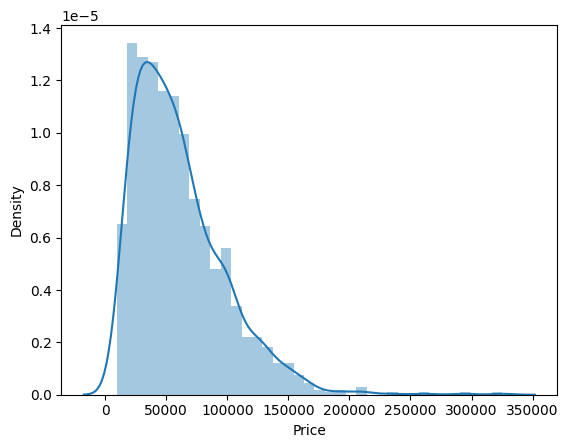

In [68]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

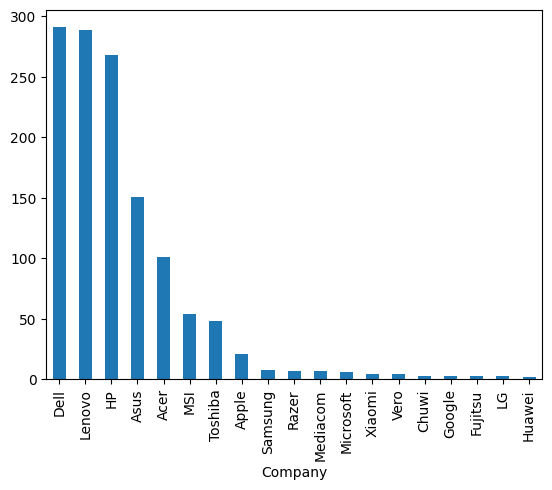

In [69]:
df['Company'].value_counts().plot(kind='bar')

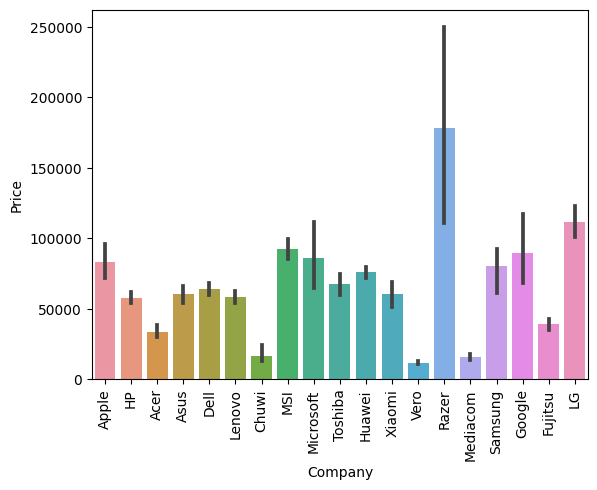

In [70]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

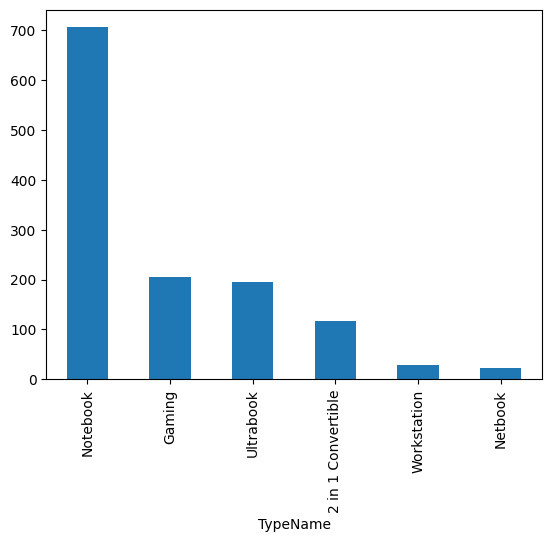

In [71]:
df['TypeName'].value_counts().plot(kind='bar')

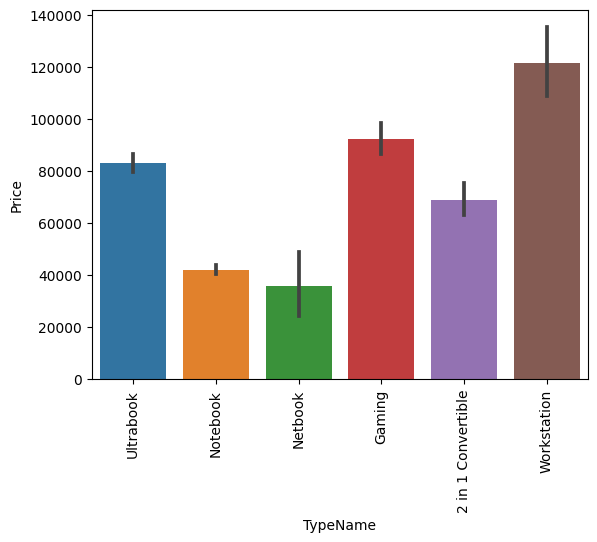

In [72]:
sns.barplot(x=df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

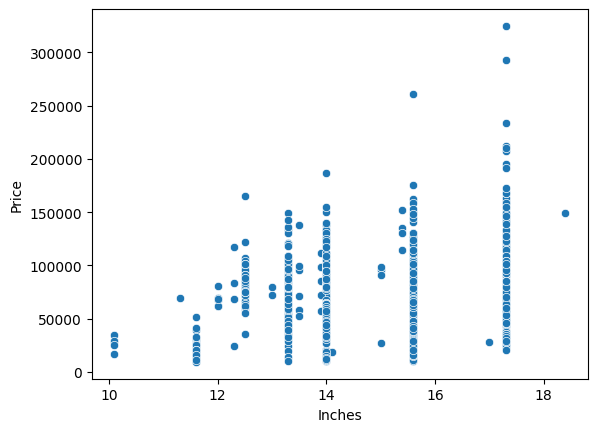

In [73]:
sns.scatterplot(x=df['Inches'], y = df['Price'])

In [74]:

df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
0,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,8,Intel,Mac,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,8,Intel,Others,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,16,AMD,Mac,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256.0,0.0,0.0,0.0


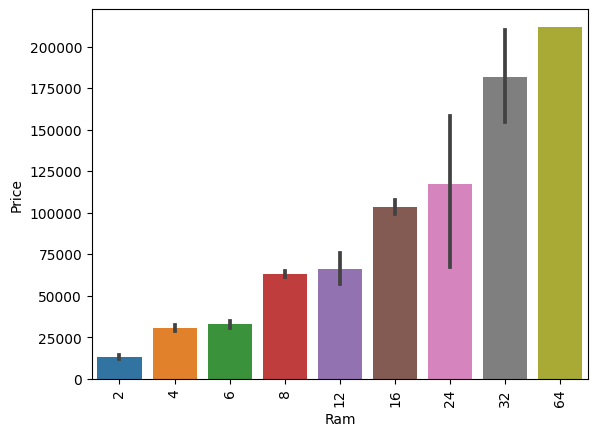

In [75]:
sns.barplot(x=df['Ram'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

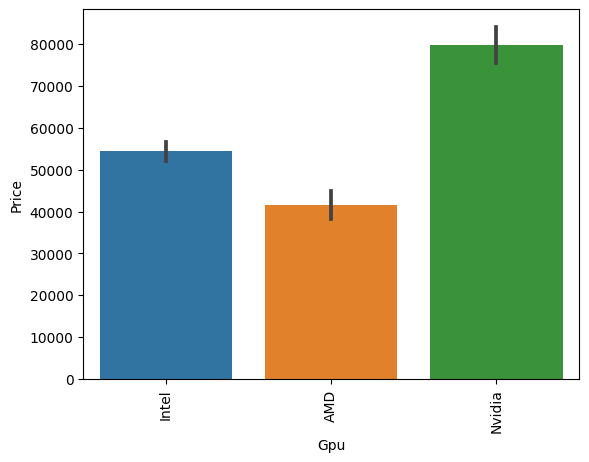

In [89]:
sns.barplot(x=df['Gpu'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4772\3406699339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Inches)


<Axes: xlabel='Inches', ylabel='Density'>

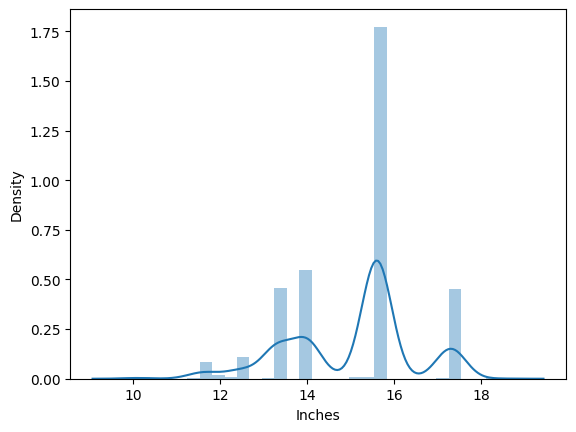

In [92]:
sns.distplot(df.Inches)

In [100]:
df['Company'] = df.Company.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   string 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   Ram               1273 non-null   int32  
 4   Gpu               1273 non-null   object 
 5   OpSys             1273 non-null   object 
 6   Weight            1273 non-null   float32
 7   Price             1273 non-null   float64
 8   Touchscreen       1273 non-null   int64  
 9   Ips               1273 non-null   int64  
 10  x_resolution      1273 non-null   int32  
 11  y_resolution      1273 non-null   int32  
 12  cpu_name          1273 non-null   object 
 13  cpu_speed_ghz     1273 non-null   float64
 14  ssd_gb            1273 non-null   float32
 15  hhd_gb            1273 non-null   float32
 16  flash_storage_gb  1273 non-null   float32
 17  

In [101]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution,cpu_name,cpu_speed_ghz,ssd_gb,hhd_gb,flash_storage_gb,hybrid_gb
0,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,71378.6832,0,1,2560,1600,Intel Core i5,2.3,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,8,Intel,Mac,1.34,47895.5232,0,0,1440,900,Intel Core i5,1.8,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,8,Intel,Others,1.86,30636.0000,0,0,1920,1080,Intel Core i5,2.5,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,16,AMD,Mac,1.83,135195.3360,0,1,2880,1800,Intel Core i7,2.7,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,96095.8080,0,1,2560,1600,Intel Core i5,3.1,256.0,0.0,0.0,0.0


In [102]:
df.TypeName = df.TypeName.astype('string')
df.Gpu = df.Gpu.astype('string')
df.OpSys= df.OpSys.astype('string')
df.cpu_name=df.cpu_name.astype('string')


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   string 
 1   TypeName          1273 non-null   string 
 2   Inches            1273 non-null   float32
 3   Ram               1273 non-null   int32  
 4   Gpu               1273 non-null   string 
 5   OpSys             1273 non-null   string 
 6   Weight            1273 non-null   float32
 7   Price             1273 non-null   float64
 8   Touchscreen       1273 non-null   int64  
 9   Ips               1273 non-null   int64  
 10  x_resolution      1273 non-null   int32  
 11  y_resolution      1273 non-null   int32  
 12  cpu_name          1273 non-null   string 
 13  cpu_speed_ghz     1273 non-null   float64
 14  ssd_gb            1273 non-null   float32
 15  hhd_gb            1273 non-null   float32
 16  flash_storage_gb  1273 non-null   float32
 17  

In [128]:
df.corr(numeric_only=True).Price * 100


Inches                6.607844
Ram                  73.999595
Weight               21.166693
Price               100.000000
Touchscreen          19.038230
Ips                  25.151387
x_resolution         55.293912
y_resolution         54.994382
cpu_speed_ghz        43.241638
ssd_gb               67.541283
hhd_gb               -9.666706
flash_storage_gb     -3.671210
hybrid_gb            -0.536080
Name: Price, dtype: float64

In [130]:
df.drop(columns='hybrid_gb',inplace=True)